# Loading Images Using tf.Data.Dataset

**Learning Objectives**

1. Retrieve Images using tf.keras.utils.get_file
2. Load Images using Keras Pre-Processing
3. Load Images using tf.Data.Dataset
4. Understand basic Methods for Training

## Introduction 

In this notebook, we load an image dataset using tf.data.  The dataset used in this example is distributed as directories of images, with one class of image per directory.


Each learning objective will correspond to a **#TODO** in the [student lab notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/introduction_to_tensorflow/solutions/load_images_tf.data.ipynb) -- try to complete that notebook first before reviewing this solution notebook.

In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.7.0


In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

### Retrieve the images

Before you start any training, you will need a set of images to teach the network about the new classes you want to recognize. You can use an archive of creative-commons licensed flower photos from Google.

Note: all images are licensed CC-BY, creators are listed in the `LICENSE.txt` file.

In [5]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 405s 2us/step


In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips'],
      dtype='<U10')

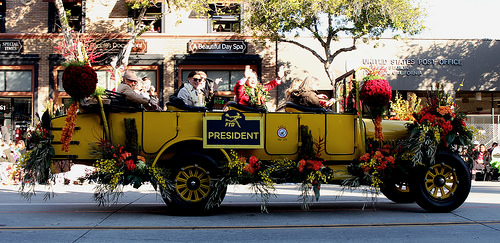

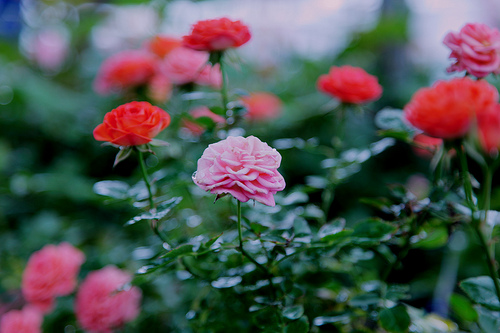

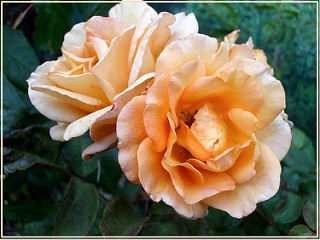

In [10]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

## Load using `keras.preprocessing`

A simple way to load images is to use `tf.keras.preprocessing`.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1./255)
# TODO 1a
# TODO -- Your code here.

In [14]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [15]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [16]:
import numpy as np
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
  # TODO 1b
      ax = plt.subplot(5, 5, n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

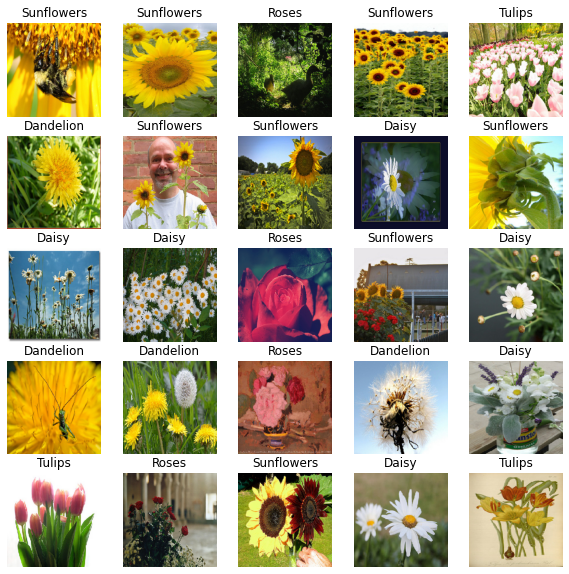

In [17]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

## Load using `tf.data`

The above `keras.preprocessing` method is convienient, but has three downsides: 

1. It's slow. See the performance section below.
1. It lacks fine-grained control.
1. It is not well integrated with the rest of TensorFlow.

To load the files as a `tf.data.Dataset` first create a dataset of the file paths:

In [18]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [20]:
for f in list_ds.take(5):
  print(f.numpy())

b'/Users/ceyhun/.keras/datasets/flower_photos/roses/2777518561_105abc8cfc_n.jpg'
b'/Users/ceyhun/.keras/datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'
b'/Users/ceyhun/.keras/datasets/flower_photos/tulips/4599815420_8ee42c2382.jpg'
b'/Users/ceyhun/.keras/datasets/flower_photos/dandelion/14313509432_6f2343d6c8_m.jpg'
b'/Users/ceyhun/.keras/datasets/flower_photos/roses/3145692843_d46ba4703c.jpg'
